In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-6.6478224 , -1.02279366],
       [-0.12855422, -8.01956025],
       [-5.7314832 , -0.85067789],
       ...,
       [-0.73255787, -8.79823848],
       [-0.60255352, -7.35221902],
       [ 0.36255656, -6.63794092]], shape=(1000, 2))

In [4]:
y

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 2, 2, 1,
       1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1,
       2, 2, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 1,
       0, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 0, 0,
       2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 2, 2,
       2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1,
       1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 2, 0,
       2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 2, 2,
       2, 1, 2, 2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 2, 0, 1,

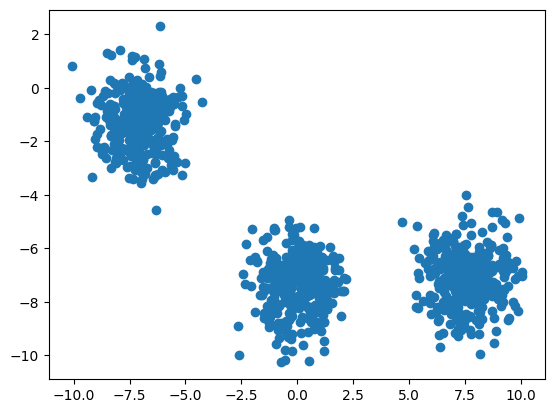

In [5]:
plt.scatter(X[:,0],X[:,1])

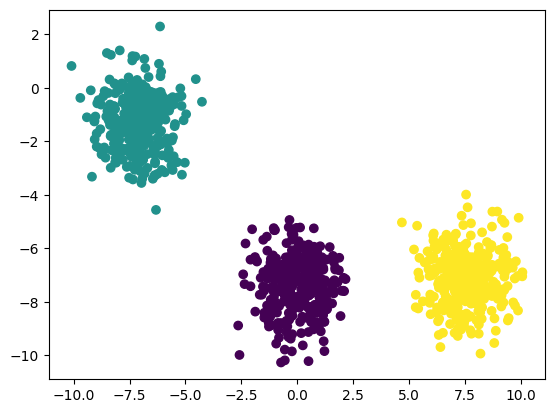

In [6]:
plt.scatter(X[:,0],X[:,1],c=y) ## c for colour

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
X_train_scaled = scaler.fit_transform(X_train)

In [10]:
X_test_scaled = scaler.transform(X_test)

In [11]:
## We dont do scaling for the outut features

In [12]:
from sklearn.cluster import KMeans

In [13]:
## ELBOW METHOD to select the k value

wcss = []
for k in range(1, 11):  ### for example k values from 1 to 10
    k_means = KMeans(n_clusters=k,init='k-means++')
    k_means.fit(X_train_scaled)
    wcss.append(k_means.inertia_)
    
    
    '''The  attribute of the fitted K-Means model contains the WCSS value. 
    This is essentially the measure of 
    how tightly the data points are grouped around their respective centroids.'''
    
    ## fit is used to run the clustering algorith on the data

In [14]:
wcss

[1339.9999999999993,
 259.83027785289823,
 88.27148415048157,
 74.61986371602471,
 60.52371565920852,
 42.774992868072054,
 38.25234906488525,
 34.24108952699668,
 30.566804688722637,
 28.99912789651564]

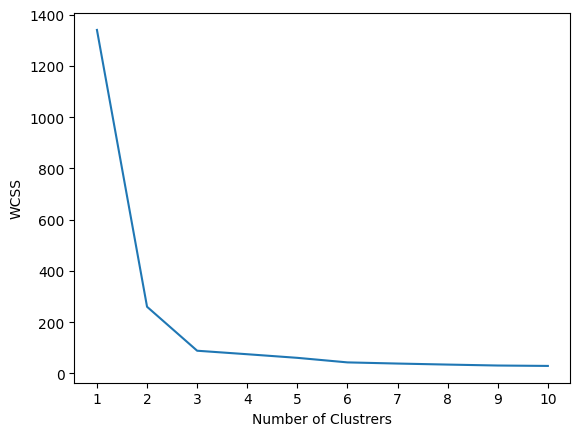

In [15]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [17]:
kmeans.fit_predict(X_train_scaled)

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2,
       0, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 1,
       0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 0, 0,
       2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 0, 1, 2, 2,
       0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0,
       1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 0,
       2, 2, 0, 2, 0, 1, 2, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0,
       0, 2, 2, 0, 0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 0, 0,
       0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 2,
       1, 0, 1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1,
       0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 0,

In [18]:
y_pred = kmeans.fit_predict(X_test_scaled)

In [19]:
y_pred

array([1, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 0, 2,
       1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 1,
       2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 1,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 1, 0, 2,
       2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 2,
       1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1,
       1, 0, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2,
       1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1, 1, 0,
       0, 2, 2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 1,

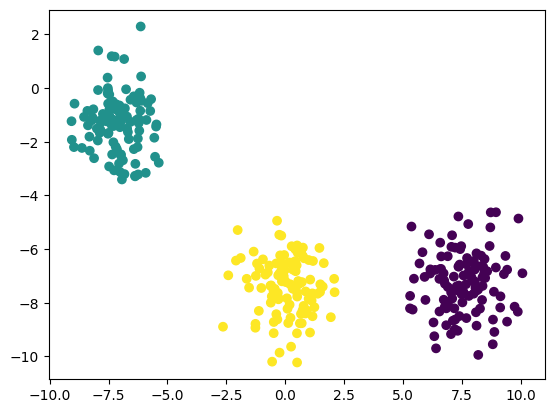

In [20]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [21]:
## Validating the k value. Two techniques: 
## kneelocator
## Silhoutee scoring

In [22]:
## kneelocator
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [33]:
from kneed import KneeLocator

In [34]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [35]:
kl.elbow

np.int64(3)

In [36]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [37]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [38]:
silhouette_coefficients

[np.float64(0.724948537429082),
 np.float64(0.7138538901947796),
 np.float64(0.6253102350805478),
 np.float64(0.5607865399161702),
 np.float64(0.43199317491451383),
 np.float64(0.408426217004972),
 np.float64(0.387778159106731),
 np.float64(0.34690013275817694),
 np.float64(0.3429645259696863)]

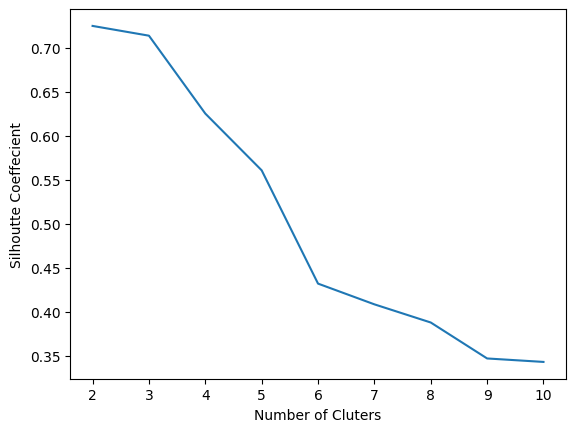

In [39]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()